In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


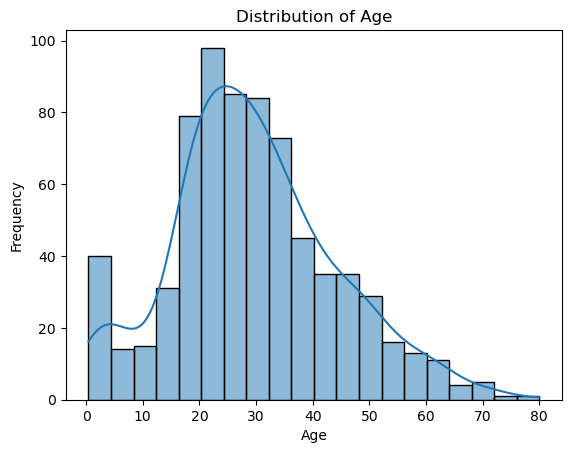

In [20]:
sns.histplot(data=train_df, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

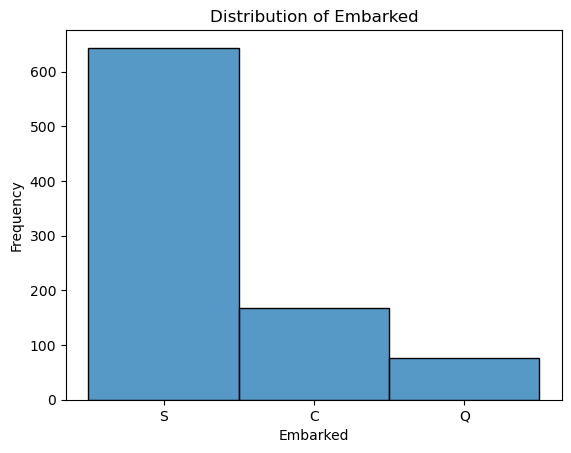

In [21]:
sns.histplot(data=train_df, x='Embarked')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('Distribution of Embarked')
plt.show()

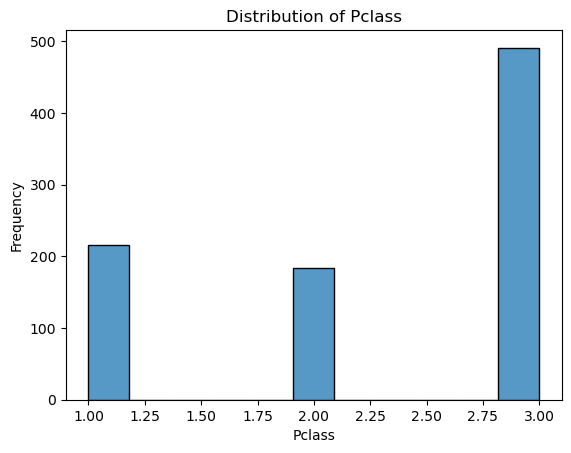

In [22]:
sns.histplot(data=train_df, x='Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title('Distribution of Pclass')
plt.show()

In [ ]:
survived = df_train[df_train['Survived'] == 1]
not_survived = df_train[~(df_train['Survived'] == 1)]

plt.scatter(survived['Fare'], survived['Survived'], c='red', label='Survived')
plt.scatter(not_survived['Fare'], not_survived['Survived'], c='blue', label='Not Survived')
plt.xlabel('Ticket Fare')
plt.ylabel('')

## Feature analysis

З опису колонок зрозуміло, що для тренування колонки з ідентифікатором `PassengerId`, ім'ям `Name`, номером квитка `Ticket`, номером каюти `Cabin` є непотрібними, колонку Survived можна використати для тестування

In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
numerical = ['age', 'fare']
categorical = ['pclass', 'sex', 'sibsp', 'parch', 'embarked']

Напишемо функцію, що з датафрейму виділяє тільки потрібні фічі та хендлить нульові значення для числових та категоріальних колонок

In [7]:
def prepare_X(df):
    df = df.copy()
    df.columns = df.columns.str.lower()
    for col in numerical:
        df.fillna({col: df[col].median()}, inplace=True)
    for col in categorical:
        df.fillna({col: df[col].mode()[0]}, inplace=True)
    
    df = df[numerical + categorical]
    dv = DictVectorizer(sparse=False)
    df_dicts = df.to_dict(orient='records')
    X = dv.fit_transform(df_dicts)
    return X

In [9]:
X_train = prepare_X(train_df)
X_test = prepare_X(test_df)
y_train = train_df['Survived'].values

In [16]:
classifier = KMeans(n_clusters=2, algorithm='elkan', n_init=1, random_state=2).fit(X_train)

In [17]:
y_pred = classifier.predict(X_train)

roc_auc = roc_auc_score(y_pred, y_train)
print(f"Roc auc score: {roc_auc:.3f}")

Roc auc score: 0.698


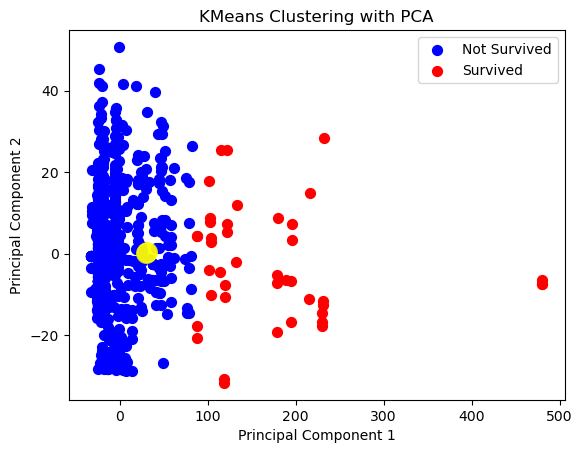

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.scatter(X_pca[y_pred == 0, 0], X_pca[y_pred == 0, 1], c='blue', s=50, label='Not Survived')
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], c='red', s=50, label='Survived')
plt.scatter(classifier.cluster_centers_[:, 0], classifier.cluster_centers_[:, 1], c='yellow', s=200, alpha=0.75)
plt.title('KMeans Clustering with PCA')
plt.legend()

In [19]:
y_test = classifier.predict(X_test)
submission_df = pd.DataFrame(test_df['PassengerId'])
submission_df['Survived'] = y_test
submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [14]:
submission_df.to_csv('submission.csv', index=False)

<img src='./result.png' alt='result'/>